## 樸素貝氏分類

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
import warnings
# 忽略警告
warnings.filterwarnings('ignore')

In [3]:
X, y = load_breast_cancer(return_X_y=True) # 讀取乳癌資料集
# 分割訓練與測試資料，並保持類別比例一致
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    random_state=11) # stratify=y 保持類別比例一致


In [4]:
X.shape, X_train.shape # X.shape , X_train.shape 表示資料集與訓練集的維度
# (569, 30), (426, 30)

((569, 30), (426, 30))

In [5]:
lr = LogisticRegression() # 邏輯斯迴歸
nb = GaussianNB() # 高斯樸素貝氏
bn = BernoulliNB() # 伯努利樸素貝氏

lr_scores = []
nb_scores = []
bn_scores = []

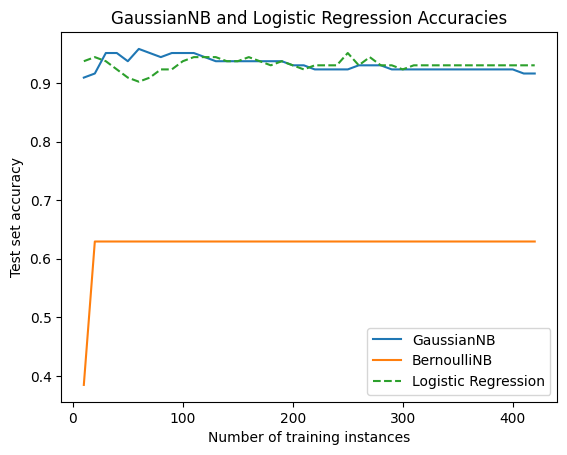

In [6]:
train_sizes = range(10, len(X_train), 10)# 10~425, 間隔10

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(
        X_train, y_train, train_size=train_size, stratify=y_train, random_state=11)
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))
    lr.fit(X_slice, y_slice)
    lr_scores.append(lr.score(X_test, y_test))
    bn.fit(X_slice, y_slice)
    bn_scores.append(bn.score(X_test, y_test))

plt.plot(train_sizes, nb_scores, label='GaussianNB')
plt.plot(train_sizes, bn_scores, label='BernoulliNB')
plt.plot(train_sizes, lr_scores, linestyle='--', label='Logistic Regression')
plt.title("GaussianNB and Logistic Regression Accuracies")
plt.xlabel("Number of training instances")
plt.ylabel("Test set accuracy")
plt.legend()

### 練習 2

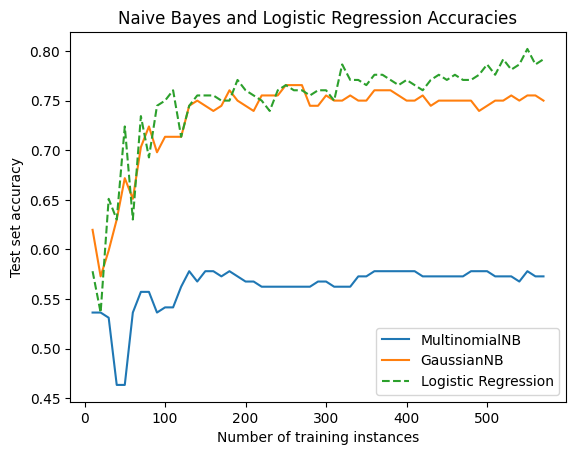

In [7]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv('pima-indians-diabetes.data', header=None)
y = df[8]
X = df[[0, 1, 2, 3, 4, 5, 6, 7]]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

lr = LogisticRegression()
nb2 = GaussianNB()
nb = MultinomialNB()#BernoulliNB()

lr_scores = []
nb_scores = []
nb2_scores = []

train_sizes = range(10, len(X_train), 10)

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(
        X_train, y_train, train_size=train_size, stratify=y_train, random_state=11)
    nb.fit(X_slice, y_slice)
    nb_scores.append(nb.score(X_test, y_test))
    lr.fit(X_slice, y_slice)
    lr_scores.append(lr.score(X_test, y_test))
    nb2.fit(X_slice, y_slice)
    nb2_scores.append(nb2.score(X_test, y_test))

plt.plot(train_sizes, nb_scores, label='MultinomialNB')
plt.plot(train_sizes, nb2_scores, label='GaussianNB')
plt.plot(train_sizes, lr_scores, linestyle='--', label='Logistic Regression')
plt.title("Naive Bayes and Logistic Regression Accuracies")
plt.xlabel("Number of training instances")
plt.ylabel("Test set accuracy")
plt.legend()